### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,total_moves,w_captures,w_checks,w_castles,w_promotions,b_captures,b_checks,b_castles,...,check_diff,total_promotions,promotion_diff,aggression_diff,both_castled,game_length_short,game_length_medium,game_length_long,tactical_intensity,white_more_aggressive
0,2504,2371,49,4,0,1,0,4,0,1,...,0,0,0,-0.006667,1,0,1,0,0.163265,0
1,2487,2596,71,8,10,1,0,7,2,1,...,8,0,0,0.242857,1,0,0,1,0.380282,1
2,2915,2921,59,4,0,1,0,4,0,1,...,0,0,0,-0.004598,1,0,1,0,0.135593,0
3,2542,2433,71,10,1,1,0,9,3,0,...,-2,0,0,-0.037302,0,0,0,1,0.323944,0
4,2473,2658,56,5,3,1,0,6,0,1,...,3,0,0,0.071429,1,0,1,0,0.250000,1


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3267529, 36)
Target: (3267529,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 62.53 seconds (1.04 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.8328 (83.28%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.84      0.86      0.85    267653
        Draw       0.73      0.58      0.65     84330
   White Win       0.85      0.88      0.86    301523

    accuracy                           0.83    653506
   macro avg       0.81      0.77      0.79    653506
weighted avg       0.83      0.83      0.83    653506



### 6. Confusion Matrix

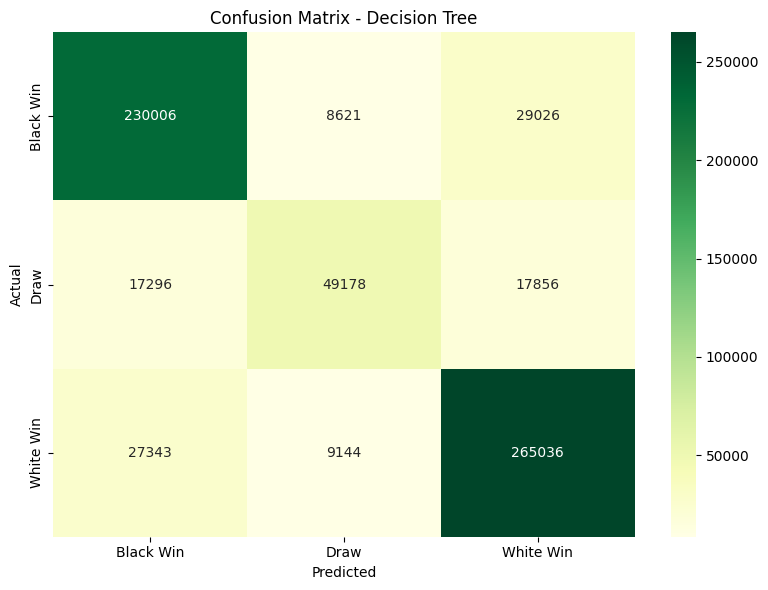

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                  Feature  Importance
23           capture_diff    0.250648
29        aggression_diff    0.177116
2             total_moves    0.115705
24       capture_diff_abs    0.079937
17              AvgRating    0.041989
7              b_captures    0.041068
19   WhiteRatingAdvantage    0.035987
1                BlackElo    0.032244
26             check_diff    0.030488
21          TerminationID    0.028263
0                WhiteElo    0.027492
28         promotion_diff    0.026945
35  white_more_aggressive    0.016657
3              w_captures    0.015192
11         w_capture_rate    0.012042
22         total_captures    0.010152
12         b_capture_rate    0.009584
16             RatingDiff    0.005437
8                b_checks    0.005232
13     w_aggression_score    0.005127
34     tactical_intensity    0.005103
6            w_promotions    0.004681
4                w_checks    0.003834
10           b_promotions    0.003777
14     b_aggression_score    

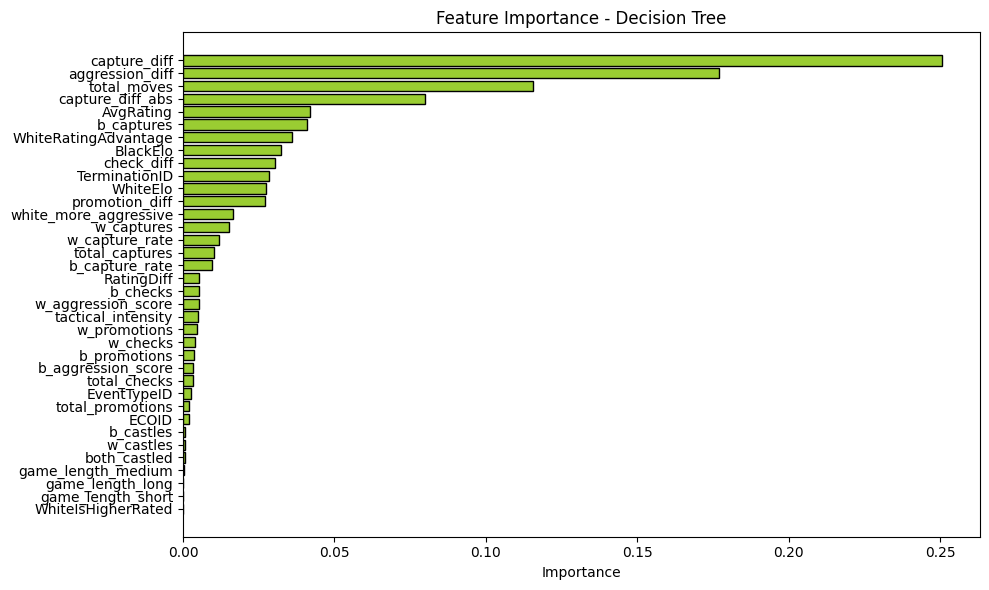

In [9]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],
         color='yellowgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()